In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b07b61a9734ffdb538936c12a27a0b7f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | jizan
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | maturin
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ambilobe
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | vuktyl
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Proces

Processing Record 39 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | elbistan
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | mayya
Processing Record 45 of Set 4 | mentok
City not found. Skipping...
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | bam
Processing Record 48 of Set 4 | coahuayana
Processing Record 49 of Set 4 | boundiali
Processing Record 50 of Set 4 | lenki
City not found. Skipping...
Processing Record 1 of Set 5 | nacozari
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | maragogi
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | kiruna
Processing Record 7 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 8 of Set 5 | burgeo
Processing Record 9 of Set 5 | ribeir

Processing Record 25 of Set 8 | carnarvon
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | verkhoyansk
Processing Record 28 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 29 of Set 8 | menongue
Processing Record 30 of Set 8 | itaquyry
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | murgab
Processing Record 34 of Set 8 | bikaner
Processing Record 35 of Set 8 | axim
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | taloqan
Processing Record 38 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 8 | sakaiminato
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | farafangana
Processing Record 42 of Set 8 | the valley
Processing Record 43 of Set 8 | lyaskelya
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | kandalaksha
Processing Record 46 of Set 8 | brownsville
Processing Record 47 

Processing Record 11 of Set 12 | samarkand
Processing Record 12 of Set 12 | panguipulli
Processing Record 13 of Set 12 | hay river
Processing Record 14 of Set 12 | casa nova
Processing Record 15 of Set 12 | malinyi
Processing Record 16 of Set 12 | san vicente
Processing Record 17 of Set 12 | lima
Processing Record 18 of Set 12 | sosua
Processing Record 19 of Set 12 | altamira
Processing Record 20 of Set 12 | galgani
City not found. Skipping...
Processing Record 21 of Set 12 | sulurpeta
City not found. Skipping...
Processing Record 22 of Set 12 | togur
Processing Record 23 of Set 12 | troy
Processing Record 24 of Set 12 | jaque
Processing Record 25 of Set 12 | vizimyary
City not found. Skipping...
Processing Record 26 of Set 12 | ust-karsk
Processing Record 27 of Set 12 | vredendal
Processing Record 28 of Set 12 | sucua
Processing Record 29 of Set 12 | tungor
Processing Record 30 of Set 12 | mwene-ditu
Processing Record 31 of Set 12 | ripiceni
Processing Record 32 of Set 12 | namibe
Pro

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.19,92,91,8.10,AR,2022-04-03 05:01:37
1,Rikitea,-23.1203,-134.9692,75.74,60,15,7.63,PF,2022-04-03 05:05:10
2,Jizan,17.3333,42.6667,87.96,38,2,1.25,SA,2022-04-03 05:05:10
3,Busselton,-33.6500,115.3333,69.33,83,91,18.90,AU,2022-04-03 05:05:11
4,Bluff,-46.6000,168.3333,57.52,73,77,17.38,NZ,2022-04-03 05:05:11
5,Talnakh,69.4865,88.3972,7.21,91,99,6.06,RU,2022-04-03 05:05:11
6,Jamestown,42.0970,-79.2353,34.52,67,100,4.61,US,2022-04-03 05:02:55
7,Port Alfred,-33.5906,26.8910,64.18,96,100,3.00,ZA,2022-04-03 05:05:12
8,Maturin,9.7500,-63.1767,71.49,95,38,4.09,VE,2022-04-03 05:05:12
9,Punta Arenas,-53.1500,-70.9167,44.11,75,56,24.96,CL,2022-04-03 05:00:15


In [12]:
new_city_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_data_df]


In [13]:
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-03 05:01:37,-54.8000,-68.3000,38.19,92,91,8.10
1,Rikitea,PF,2022-04-03 05:05:10,-23.1203,-134.9692,75.74,60,15,7.63
2,Jizan,SA,2022-04-03 05:05:10,17.3333,42.6667,87.96,38,2,1.25
3,Busselton,AU,2022-04-03 05:05:11,-33.6500,115.3333,69.33,83,91,18.90
4,Bluff,NZ,2022-04-03 05:05:11,-46.6000,168.3333,57.52,73,77,17.38
...,...,...,...,...,...,...,...,...,...
558,Racale,IT,2022-04-03 05:19:54,39.9631,18.0938,46.27,64,5,18.07
559,Pacific Grove,US,2022-04-03 05:19:55,36.6177,-121.9166,54.41,86,100,5.99
560,Medicine Hat,CA,2022-04-03 05:15:25,50.0501,-110.6683,41.43,75,100,21.85
561,Kalulushi,ZM,2022-04-03 05:19:55,-12.8378,28.0919,62.13,98,97,3.18


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

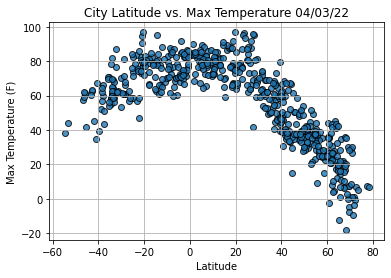

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

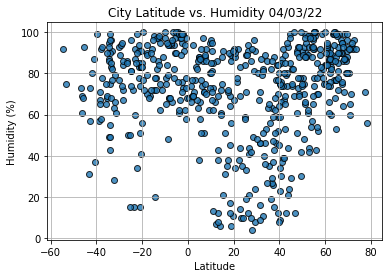

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

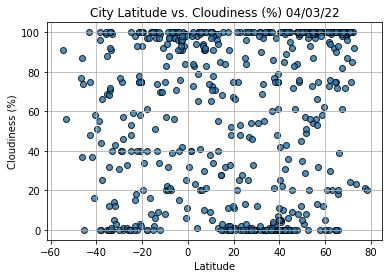

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

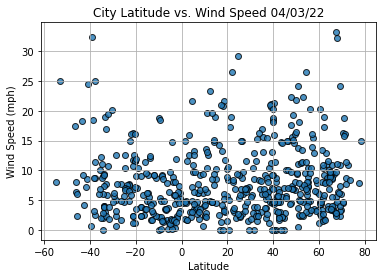

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Vuktyl
Country                        RU
Date          2022-04-03 05:05:13
Lat                       63.8567
Lng                       57.3094
Max Temp                    22.59
Humidity                       77
Cloudiness                     92
Wind Speed                   8.55
Name: 13, dtype: object

In [22]:
# to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0


0      False
1      False
2       True
3      False
4      False
       ...  
558     True
559     True
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jizan,SA,2022-04-03 05:05:10,17.3333,42.6667,87.96,38,2,1.25
5,Talnakh,RU,2022-04-03 05:05:11,69.4865,88.3972,7.21,91,99,6.06
6,Jamestown,US,2022-04-03 05:02:55,42.0970,-79.2353,34.52,67,100,4.61
8,Maturin,VE,2022-04-03 05:05:12,9.7500,-63.1767,71.49,95,38,4.09
11,Georgetown,MY,2022-04-03 05:01:28,5.4112,100.3354,89.53,58,20,3.44


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

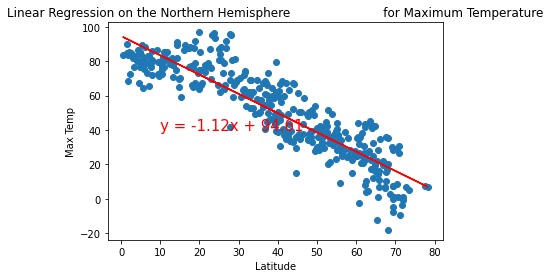

In [38]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(10,40))

In [26]:
linregress(x_values, y_values)

LinregressResult(slope=-1.1197185563416463, intercept=94.60544956501757, rvalue=-0.8983523553495922, pvalue=6.677901222560373e-139, stderr=0.02797691673899448, intercept_stderr=1.2445657287701968)

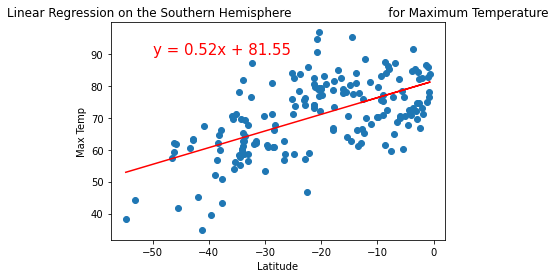

In [27]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [28]:
linregress(x_values, y_values)

LinregressResult(slope=0.5221749861938673, intercept=81.5493957412385, rvalue=0.5942045113137189, pvalue=2.2655759258252906e-18, stderr=0.05327818352044575, intercept_stderr=1.3172098907068126)

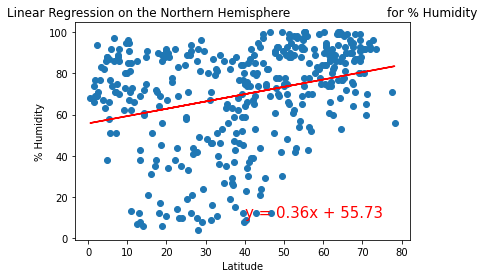

In [29]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


In [34]:
linregress(x_values, y_values)

LinregressResult(slope=0.3033638765534581, intercept=84.27695947845034, rvalue=0.2207808902575578, pvalue=0.003061794908936155, stderr=0.10101705653609248, intercept_stderr=2.4974700188186345)

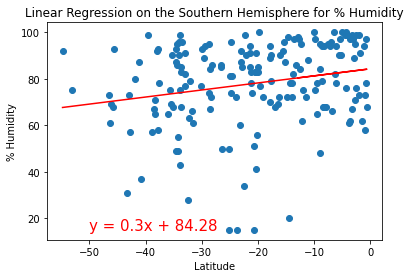

In [32]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [33]:
linregress(x_values, y_values)

LinregressResult(slope=0.3033638765534581, intercept=84.27695947845034, rvalue=0.2207808902575578, pvalue=0.003061794908936155, stderr=0.10101705653609248, intercept_stderr=2.4974700188186345)

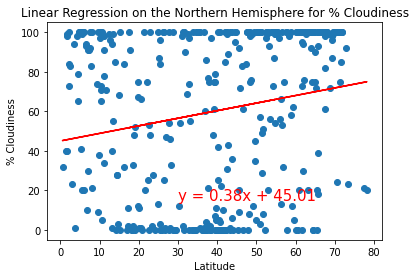

In [40]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,15))

In [36]:
linregress(x_values, y_values)

LinregressResult(slope=0.38302773519088534, intercept=45.00789370392492, rvalue=0.19172767639735722, pvalue=0.00015376599914517327, stderr=0.10018746625047804, intercept_stderr=4.456884513434313)

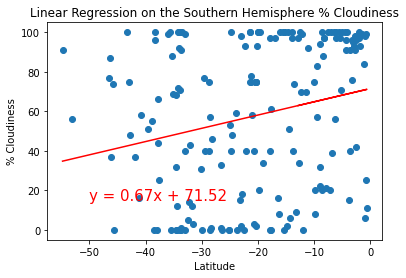

In [48]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere % Cloudiness', '% Cloudiness',(-50,15))


In [46]:
linregress(x_values, y_values)

LinregressResult(slope=0.6702192877071326, intercept=71.51657534736503, rvalue=0.2340283256235022, pvalue=0.0016659332180304865, stderr=0.2098751800256663, intercept_stderr=5.188796702079599)

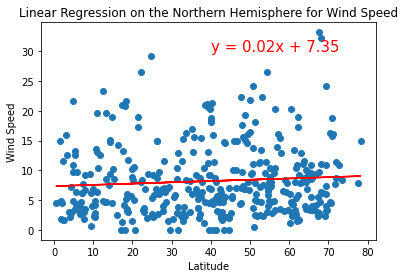

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

In [53]:
linregress(x_values, y_values)

LinregressResult(slope=0.021479196571293404, intercept=7.354472124794738, rvalue=0.07453163151734654, pvalue=0.14437477800069148, stderr=0.01468481262892793, intercept_stderr=0.6532604969260936)

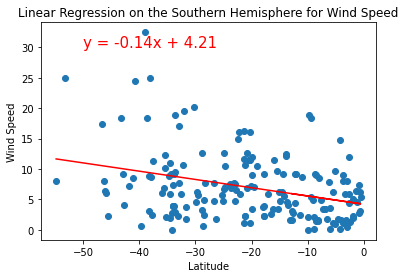

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))


In [58]:
linregress(x_values, y_values)

LinregressResult(slope=-0.1358610181728962, intercept=4.211378521963993, rvalue=-0.32705320721488407, pvalue=8.356114312980329e-06, stderr=0.029590659903048225, intercept_stderr=0.7315773046556471)